## Intro
In this project, we gathered information about Pittsburgh neighborhoods to see which neighborhood would be the most ideal for a robber (criminal) to live in. Our approach was to get the amount of arrests in Pittsburgh neighborhoods, the amount of firearm seizures in the Pittsburgh neighborhoods, and then the Pittsburgh nighborhood with the most supermarkets to rob from. The neighborhhod with the least firearm seizures, the least arrests, and the most supermarkets is the best neighborhood. We came up with these data sets by looking at the different datasets that had data about criminal activity. 

## Metric
The datasets that we are using are the amount of arrests in Pittsburgh neighborhoods, the amount of firearm seizures in Pittsburgh neighborhoods, and the amount of supermarkets in Pittsburgh neighborhoods. 

The final metric is calculated by amount of stores / (amount of retail arrests + amount of gun seizures) to be able to get the mathmatically "best" neighborhood for a robber according to our datasets by getting which neighborhhod has the most supermarkets and the least firearm seizures and arrests. 

In [40]:
import json
 
arrests = json.load(open('arrests.json')) 
seizures = json.load(open('seizures.json')) 
supermarkets = json.load(open('supermarkets.json')) 

finalData = {}

for town in supermarkets:
    score = supermarkets[town]/(arrests[town]+seizures[town])

    finalData[town] = score

sortedData = dict(sorted(finalData.items(), key=lambda item: item[1]))

print(sortedData)

print(supermarkets['Central Northside'],arrests['Central Northside'],seizures['Central Northside'])
print(supermarkets['Strip District'],arrests['Strip District'],seizures['Strip District'])

{'Homewood North': 0.00047824007651841227, 'Sheraden': 0.0007251631617113851, 'East Hills': 0.0007698229407236335, 'Allentown': 0.0009794319294809011, 'South Side Slopes': 0.0012062726176115801, 'Homewood West': 0.0012285012285012285, 'Homewood South': 0.0012531328320802004, 'Spring Hill-City View': 0.0012836970474967907, 'Northview Heights': 0.0013280212483399733, 'Bedford Dwellings': 0.0013531799729364006, 'Lincoln-Lemington-Belmar': 0.0013726835964310226, 'Knoxville': 0.0014074595355383533, 'Elliott': 0.0014144271570014145, 'Beechview': 0.0015772870662460567, 'Perry North': 0.001589825119236884, 'Highland Park': 0.001692047377326565, 'East Allegheny': 0.0018034265103697023, 'Manchester': 0.0018832391713747645, 'Middle Hill': 0.001968503937007874, 'East Liberty': 0.001996007984031936, 'Chateau': 0.002109704641350211, 'South Side Flats': 0.0022259321090706734, 'Marshall-Shadeland': 0.0024405125076266015, 'Garfield': 0.0024937655860349127, 'Upper Hill': 0.0024937655860349127, 'Bluff': 

## Creating a Graph
The code below creates a graph in ascending order from worst to best according to our metric.

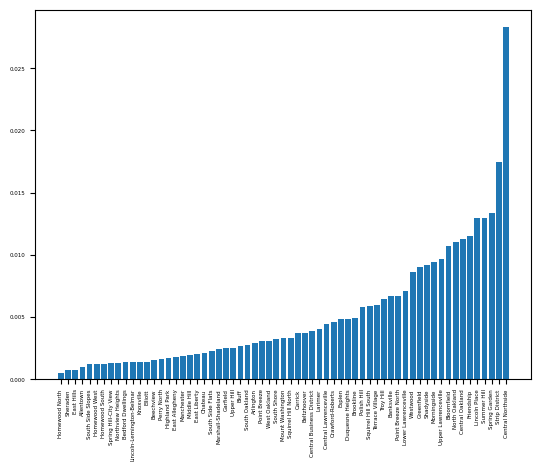

In [41]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 4})

plt.bar(*zip(*sortedData.items()))
plt.xticks(rotation = 90)
plt.show()

To better understand the data, this map shows what areas have higher or lower scores.

C:\Users\Ean Smith\AppData\Local\Temp\ipykernel_11132\2946343815.py:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '0.006711409395973154' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  pgh.at[index,"score"] =  finalData[row["hood"]]


<Axes: >

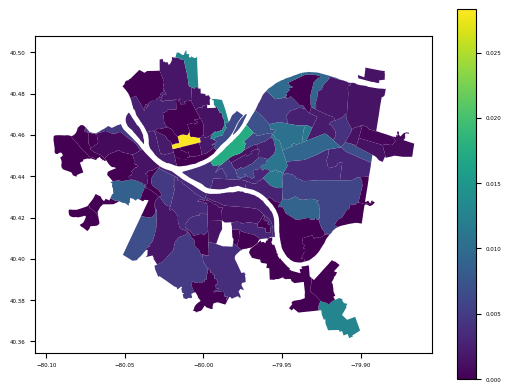

In [65]:
import geopandas

pgh = geopandas.read_file("https://data.wprdc.org/dataset/e672f13d-71c4-4a66-8f38-710e75ed80a4/resource/c5a93a8e-03d7-4eb3-91a8-c6b7db0fa261/download/pittsburghpaneighborhoods-.zip")
pgh["score"] = 0
for index, row in pgh.iterrows():
    #print(pgh["hood"].values[0])
    if row["hood"] not in finalData:
        
        row["score"] = 0
        continue
   
    pgh.at[index,"score"] =  finalData[row["hood"]]

    #print(finalData[row["hood"]] )
#pgh['score']
pgh.plot(column = "score", legend=True)

## The Best Neighborhood
The best neighborhoods, according to our data is Central Northside with 3 stores, 23 retail arrests, and 83 gun seizures. This is the best ratio of stores to arrests and gun seizures and according to the data, Central Northside scores 60 percent better then the Strip District in 2nd place.

## Conclusion

## Sydney
I would say that my personal favorite Pittsburgh neighborhood is Shady Side. Due to me not being a criminal, this metirc that we created does not apply to me, which makes sense that it did not give me my favorite neighborhood. Overall, the best neighborhhod in Pittsburgh for a criminal to live in according to our chosen data sets is Central Northside due to it having the most supermarkets with the least amount of arrests and firearm seizures overall. If look at the metric with a different perspective, Central Northside could also be the safest neighborhood with the most stores.
Overall, the best neighborhhod in Pittsburgh for a criminal to live in according to our chosen data sets is Central Northside due to it having the most supermarkets with the least amount of arrests and firearm seizures overall. Using a different perspective, Central Northside could also be the safest neighborhood with the most amount of supermarkets and convience stores. This data could be more accurate if a dataset with all retail stores was used.

Ean - I do not intend on stealing anytime soon, so I can't comment on the accuracy of the data. However, I think Central Northside has a lot of charm and the streets are very enjoyable to walk. If I had to pick a favorite neighborhood I would pick Lawrenceville because of the stores and activities.